### Customer Personality Analysis
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [4]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('C:\\Users\\Devrim\\OneDrive\\Masaüstü\\marketing_campaign.csv',header=0,sep="\t")

In [6]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
""" Automatic EDA technique
from dataprep import plot, plot_correlation, create_report, plot_missing
plot(data)"""

' Automatic EDA technique\nfrom dataprep import plot, plot_correlation, create_report, plot_missing\nplot(data)'

In [8]:
#number of rows and variables
data.shape

(2240, 29)

In [9]:
#Missing Values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
#Missing Values(%)
data.isna().sum() / data.shape[0] * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [11]:
#Duplicated Values (%)
data.duplicated().any() / data.shape[0] * 100

0.0

In [12]:
#Variable Types
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [13]:
#Categoric Variable
category_features = []
threshold = 10
for each in data.columns:
    if data[each].nunique() < threshold:
        category_features.append(each)

for each in category_features:
    data[each] = data[each].astype('category')

In [14]:
print(category_features)

['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


<AxesSubplot:>

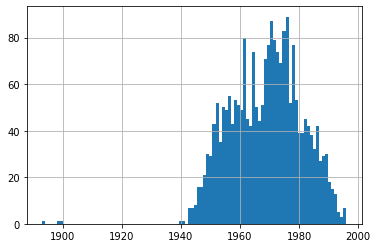

In [15]:
#Education distribution on the dataset
data['Year_Birth'].hist(bins=100)

<AxesSubplot:>

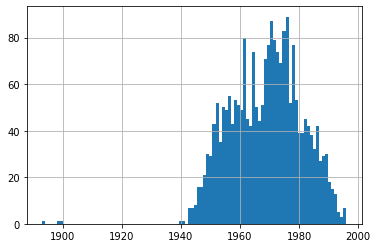

In [16]:
#Age distribution on the dataset
data['Year_Birth'].hist(bins=100)

#### New Features

In [17]:
#Finding the "Ages" of the customers
data['Age']=2022-data['Year_Birth']

In [18]:
#Creating "Spending" variable containing all of the spends
data['Spending']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [19]:
#Seniority variable creation. Loyal customers.
last_date = date(2014,4, 10)
data['Seniority'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True, format = '%d-%m-%Y')
data['Seniority'] = pd.to_numeric(data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30

In [20]:
#Rename some columns
data=data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})

In [21]:
#Changing the Marital Statuses
data['Marital_Status']=data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

In [22]:
#Changing the Educations
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [23]:
"""import random
import numpy 
import matplotlib.pyplot as plt

data['Education'] = [random.gauss(3,1) for _ in range(2240)]
data['Marital_Status'] = [random.gauss(4,2) for _ in range(2240)]

bins = numpy.linspace(-10, 10, 100)

plt.hist(data['Education'], bins, alpha=0.5, label='Education')
plt.hist(data['Marital_Status'], bins, alpha=0.5, label='Marital_Status')
plt.legend(loc='upper right')
plt.show()"""

"import random\nimport numpy \nimport matplotlib.pyplot as plt\n\ndata['Education'] = [random.gauss(3,1) for _ in range(2240)]\ndata['Marital_Status'] = [random.gauss(4,2) for _ in range(2240)]\n\nbins = numpy.linspace(-10, 10, 100)\n\nplt.hist(data['Education'], bins, alpha=0.5, label='Education')\nplt.hist(data['Marital_Status'], bins, alpha=0.5, label='Marital_Status')\nplt.legend(loc='upper right')\nplt.show()"

In [24]:
# data['Marital_Status'].hist(hue = ['Education'], bins=15)

In [25]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Seniority
0,5524,1957,Postgraduate,Alone,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,65,1617,19.433333
1,2174,1954,Postgraduate,Alone,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,68,27,1.100000
2,4141,1965,Postgraduate,In couple,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,57,776,7.733333
3,6182,1984,Postgraduate,In couple,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,38,53,1.966667
4,5324,1981,Postgraduate,In couple,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,41,422,2.700000


In [27]:
data['Kidhome'] = data['Kidhome'].astype(int)
data['Teenhome'] = data['Teenhome'].astype(int)

In [28]:
#Making a new variable called "Children" by using "Kidhome" and "Teenhome" columns. And out of that new column we create "Has_Child" variable.
data['Children'] = data.Kidhome + data.Teenhome
data['Has_child'] = np.where(data['Children'] > 0, 'Has child', 'No child')
data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)

In [29]:
#Renaming some columns
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [30]:
# Our new data
data=data[['Age','Education','Marital_Status','Income','Spending','Seniority','Has_child','Children','Wines','Fruits','Meat','Fish','Sweets','Gold']]
data.head()

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,65,Postgraduate,Alone,58138.0,1617,19.433333,No child,No child,635,88,546,172,88,88
1,68,Postgraduate,Alone,46344.0,27,1.100000,Has child,2 children,11,1,6,2,1,6
2,57,Postgraduate,In couple,71613.0,776,7.733333,No child,No child,426,49,127,111,21,42
3,38,Postgraduate,In couple,26646.0,53,1.966667,Has child,1 child,11,4,20,10,3,5
4,41,Postgraduate,In couple,58293.0,422,2.700000,Has child,1 child,173,43,118,46,27,15


#### Outliers

In [31]:
#Finding Outliers in the "Income" column
data.describe()['Income']

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

The mean is sensitive to outliers, but the fact the mean is so small compared to the max value indicates the max value is an outlier. 
- Use data visualization techniques (Histogram/Box plot/Scatter plot) to inspect the data’s distribution and verify the presence of outliers. 
- Use a statistical method to calculate the outlier data points.
- Apply a statistical method to drop or transform the outliers.

In [32]:
#Income distribution on the new dataset
import plotly.express as px
hist = px.histogram(data, x = data['Income'])
hist.show()

The data does not follow a normal distribution.

In [33]:
box= px.box(data, y="Income")
box.show()

As we can see, there is a few outliers. That thick line near 0 is the box part of our box plot. Above the box and upper fence are some points showing outliers.

In [34]:
#Using a Scatter plot, it is possible to review multivariate outliers, or the outliers that exist in two or more variables.
scatter = px.scatter(x=data['Spending'], y=data['Income'])
scatter.show()

##### Since the data doesn’t follow a normal distribution, we will calculate the outlier data points using the statistical method called interquartile range (IQR) instead of using Z-score (Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean.). Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1). 

In [35]:
#Using the convenient pandas .quantile() function, we can create a simple Python function that takes in our column from the dataframe and outputs the outliers:
#create a function to find outliers using IQR
def find_outliers_IQR(data):
    
   q1=data.quantile(0.25)

   q3=data.quantile(0.75)

   IQR=q3-q1

   outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]

   return outliers

In [36]:
# I will run through the function to return a series of the outliers.

outliers = find_outliers_IQR(data['Income'])

print("number of outliers: " + str(len(outliers)))

print("max outlier value: " + str(outliers.max()))

print("min outlier value: " + str(outliers.min()))

outliers

number of outliers: 8
max outlier value: 666666.0
min outlier value: 153924.0


164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

In [37]:
# I will replace outliers using imputation as if they were missing values
def impute_outliers_IQR(data):
    
   q1=data.quantile(0.25)

   q3=data.quantile(0.75)

   IQR=q3-q1

   upper = data[~(data>(q3+1.5*IQR))].max()

   lower = data[~(data<(q1-1.5*IQR))].min()

   data = np.where(data > upper,

       data.mean(),

       np.where(

           data < lower,

           data.mean(),

           data

           )

       )

   return data

In [38]:
data['Income'] = impute_outliers_IQR(data['Income'])
data.describe()['Income']

count      2216.000000
mean      51635.853344
std       20675.969815
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68179.500000
max      113734.000000
Name: Income, dtype: float64

In [39]:
#Visualizing without the outliers
box2= px.box(data, y="Income")
box2.show()

#### Clustering
##### Let's take a look at the clustering of clients in the dataset
I will use 4 equally weighted customer segments:
- Stars: Old customers with high income and high spending nature.
- Neet Attention: New customers with below-average income and low spending nature. 
- High Potential: New customers with high income and high spending nature.
- Leaky Bucket: Old customers with below-average income and a low spending nature.

In [41]:
data.isnull().sum()

Age                0
Education          0
Marital_Status     0
Income            24
Spending           0
Seniority          0
Has_child          0
Children           0
Wines              0
Fruits             0
Meat               0
Fish               0
Sweets             0
Gold               0
dtype: int64

In [42]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

In [43]:
#I will first normalize the data
scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

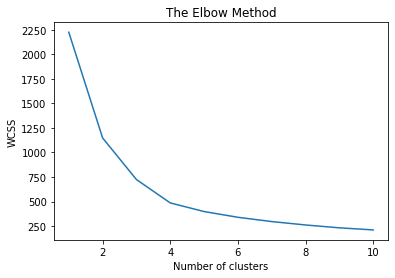

In [44]:
#Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
# I will use Gaussian Mixture Models to Cluster Data
gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)

In [53]:
pd.options.display.float_format = "{:.0f}".format
summary=data[['Income','Spending','Seniority','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().T
summary.head()

Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             461           605             534    640
       mean            72100         35012           69150  37997
       std             10037         12184           11425  12397
       min             49090          2447           44802   1730
       25%             65104         26490           60508  29311

In [54]:
#Now let’s plot this data to have a look at the clustering of customers:
PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['Seniority'],
                                z = data[data.Cluster == C]['Spending'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))